In [1]:
#import panda packages
import pandas as pd

#Read Data from CSV file And Store It IN DATAFRAME
df = pd.read_csv('NSE-TATAGLOBAL.csv')

#print TOP 10 RECORD
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
5,2018-12-28,221.75,223.30,219.55,220.75,220.80,2263147.0,5006.86
6,2018-12-27,221.80,224.90,215.20,220.10,220.05,9509683.0,20912.50
7,2018-12-26,220.40,220.40,212.40,217.95,218.55,1598566.0,3456.42
8,2018-12-24,215.55,224.00,215.40,219.05,219.05,5808490.0,12802.57
9,2018-12-21,211.00,219.60,210.80,215.00,215.40,5654362.0,12257.27


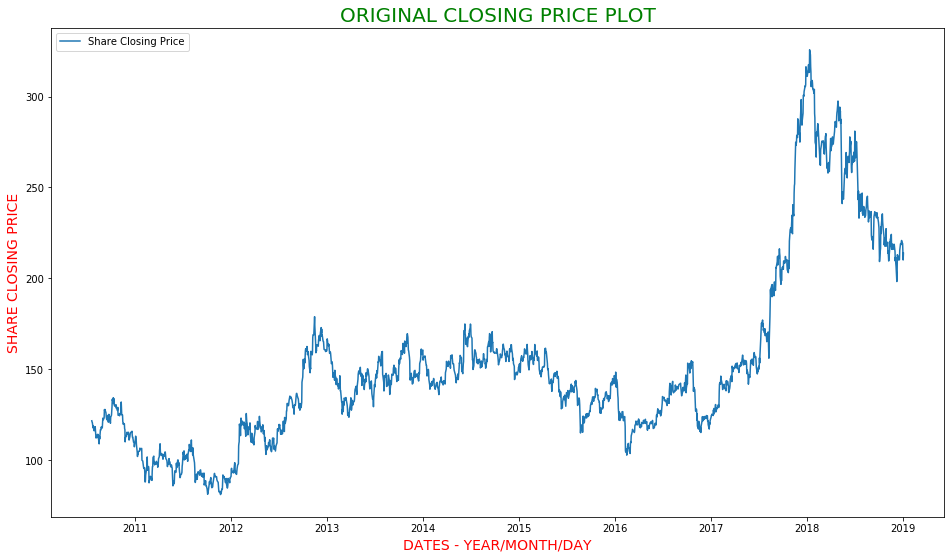

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#to plot the graph
import matplotlib.pyplot as plt
%matplotlib inline

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df['Close'], label='Share Closing Price')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('ORIGINAL CLOSING PRICE PLOT', fontsize=20, color='g')
ax.legend()

In [3]:
#Sorting
data = df.sort_index(ascending=True, axis = 0)

#Create a Seperate Dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

#new_data.to_csv('01_LSTM1.LSTMData.csv')
new_data.head(10)

,Date,Close
0,2010-07-21 00:00:00,121.55
1,2010-07-22 00:00:00,120.9
2,2010-07-23 00:00:00,120.65
3,2010-07-26 00:00:00,117.6
4,2010-07-27 00:00:00,118.65
5,2010-07-28 00:00:00,118.25
6,2010-07-29 00:00:00,116.6
7,2010-07-30 00:00:00,116.05
8,2010-08-02 00:00:00,117.3
9,2010-08-03 00:00:00,118.3


In [4]:
# SETTING new_data INDEX
new_data.index = new_data.Date
new_data.drop('Date',axis =1, inplace = True)

# TAKE ALL CLOSING PRICE
dataset = new_data.values
print(dataset)

[[121.55]
 [120.9]
 [120.65]
 ...
 [214.6]
 [210.05]
 [213.8]]


In [5]:

#creating train and test sets 
# 1 Month Prediction
train = dataset[:2080] 
test = dataset[2080:] 

train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

#train_df.to_csv('01_LSTM2.LSTM_TrainData.csv')
#test_df.to_csv('01_LSTM3.LSTM_TestData.csv')

#print(train)
#new_data.head()

In [6]:
new_data.shape, train_df.shape, test_df.shape

((2100, 1), (2080, 1), (20, 1))

In [8]:
#importing required libraries 
import numpy as np
from sklearn.preprocessing import MinMaxScaler 

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

x_train[:10]
# x_train, y_train = np.array(x_train), np.array(y_train)

# x_train_df_beforereshape = pd.DataFrame(x_train)

# #x_train_df_beforereshape.to_csv('01_LSTM4.LSTM_X_TrainData_BeforeReshape.csv')

# x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# y_train_df = pd.DataFrame(y_train)
#y_train_df.to_csv('01_LSTM5.LSTM_Y_TrainData.csv')
#x_train_df_beforereshape.head()

[array([0.16584967, 0.16319444, 0.1621732 , 0.14971405, 0.15400327,
        0.15236928, 0.14562908, 0.14338235, 0.14848856, 0.15257353,
        0.14522059, 0.13521242, 0.12724673, 0.13031046, 0.12806373,
        0.13459967, 0.12908497, 0.13562092, 0.12377451, 0.1190768 ,
        0.11397059, 0.13112745, 0.12479575, 0.14603758, 0.14501634,
        0.14726307, 0.15196078, 0.1503268 , 0.14971405, 0.16156046,
        0.17177288, 0.1693219 , 0.16830065, 0.17238562, 0.19097222,
        0.18913399, 0.19138072, 0.18382353, 0.17544935, 0.17279412,
        0.16830065, 0.17034314, 0.17810458, 0.16973039, 0.16278595,
        0.17401961, 0.18035131, 0.17422386, 0.17116013, 0.16564542,
        0.16033497, 0.17381536, 0.17851307, 0.18811275, 0.19750817,
        0.21425654, 0.21098856, 0.21772876, 0.20445261, 0.21568627]),
 array([0.16319444, 0.1621732 , 0.14971405, 0.15400327, 0.15236928,
        0.14562908, 0.14338235, 0.14848856, 0.15257353, 0.14522059,
        0.13521242, 0.12724673, 0.13031046, 0.

In [8]:
#importing required libraries 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, LSTM

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Using TensorFlow backend.


Epoch 1/1
 - 46s - loss: 0.0016


In [9]:
#predicting 15 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price_pred = model.predict(X_test)
closing_price_pred = scaler.inverse_transform(closing_price_pred)

print(closing_price_pred)
#closing_price_pred_df = pd.DataFrame(closing_price_pred)
#closing_price_pred_df.to_csv('01_LSTM6.LSTM_Predict_ClosePrice.csv')

[[220.88452]
 [218.93398]
 [215.76508]
 [213.39737]
 [213.58557]
 [214.89449]
 [216.58388]
 [217.79259]
 [218.58194]
 [219.02228]
 [219.20091]
 [220.13054]
 [221.89294]
 [223.6612 ]
 [225.4051 ]
 [226.95784]
 [227.87741]
 [228.26013]
 [227.47012]
 [225.41173]]


In [10]:
date_list = []
original_close_list = []
stcokclose_preds =[]

stcokclose_preds = [item for sublist in closing_price_pred for item in sublist]

# TAKE DATE FROM TEST DATA FRAME AND CONVERT IT TO LIST
date_list = list(new_data.index.values) 
date_list_train = date_list[:2080] 
date_list_test = date_list[2080:]
#print (date_list)

original_close_list = list(new_data['Close'])
original_close_list_train = original_close_list[:2080]
original_close_list_test = original_close_list[2080:]

# CREATE DICTIONARY USING LIST
dict = {'Date':date_list_test,'Original_Close': original_close_list_test,'Predict_Close': stcokclose_preds} 
#print(dict)

predict_df = pd.DataFrame(dict)  #CONVERT DICTIONARY TO DATAFRAME
#predict_df.to_csv('01_LSTM6.LSTM_Predict_ClosePrice.csv')
predict_df.head(15)

,Date,Original_Close,Predict_Close
0,2018-12-07,206.55,220.884521
1,2018-12-10,198.20,218.933975
2,2018-12-11,202.85,215.765076
3,2018-12-12,212.95,213.397369
4,2018-12-13,212.40,213.585571
5,2018-12-14,212.35,214.894485
6,2018-12-17,210.05,216.583878
7,2018-12-18,210.10,217.792587
8,2018-12-19,210.15,218.581940
9,2018-12-20,210.20,219.022278


In [11]:
#valid.shape, closing_price.shape
#valid.head(10)

#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

x = np.power(((predict_df['Original_Close'])-predict_df['Predict_Close']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
rmse

9.69831607087177

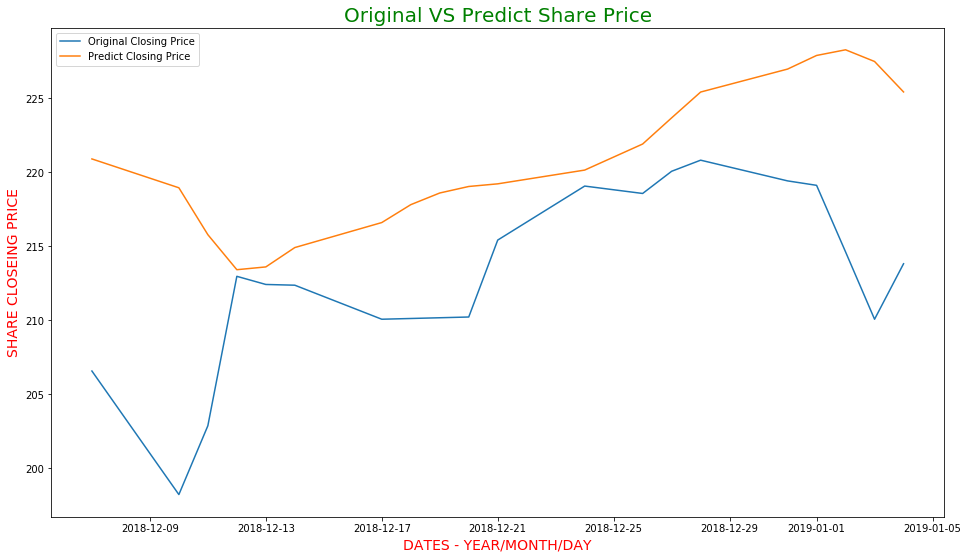

In [12]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(predict_df['Date'],predict_df['Original_Close'],label = 'Original Closing Price')
ax.plot(predict_df['Date'],predict_df['Predict_Close'],label = 'Predict Closing Price')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSEING PRICE',fontsize=14, color='r')
ax.set_title('Original VS Predict Share Price', fontsize=20, color='g')
ax.legend()